In [175]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [176]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")
from pmdarima import auto_arima 
import pandas as pd 
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [177]:
df = pd.read_csv(r'.....monthly-car-sales.csv')

In [178]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<AxesSubplot:>

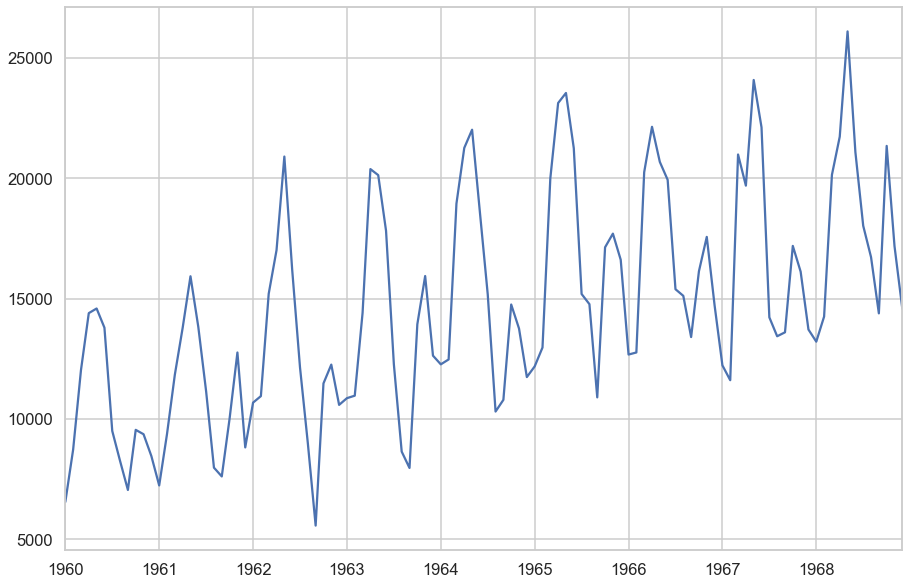

In [179]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df['Sales'].plot()

Задание №1
Разложить на компоненты, используя функцию seasonal_decompose

<AxesSubplot:>

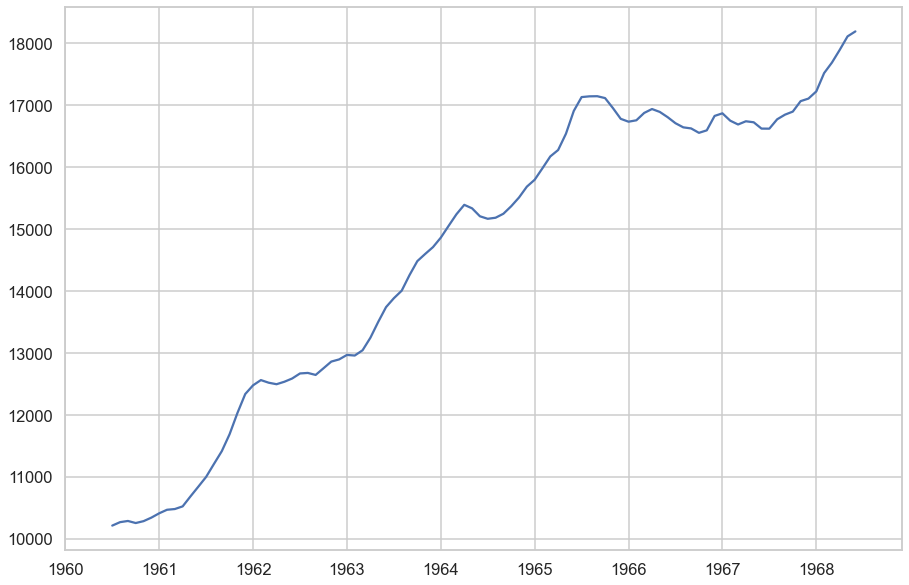

In [180]:
result=seasonal_decompose(df['Sales'], model='multiplicable', period=12)
result.trend.plot()

<AxesSubplot:>

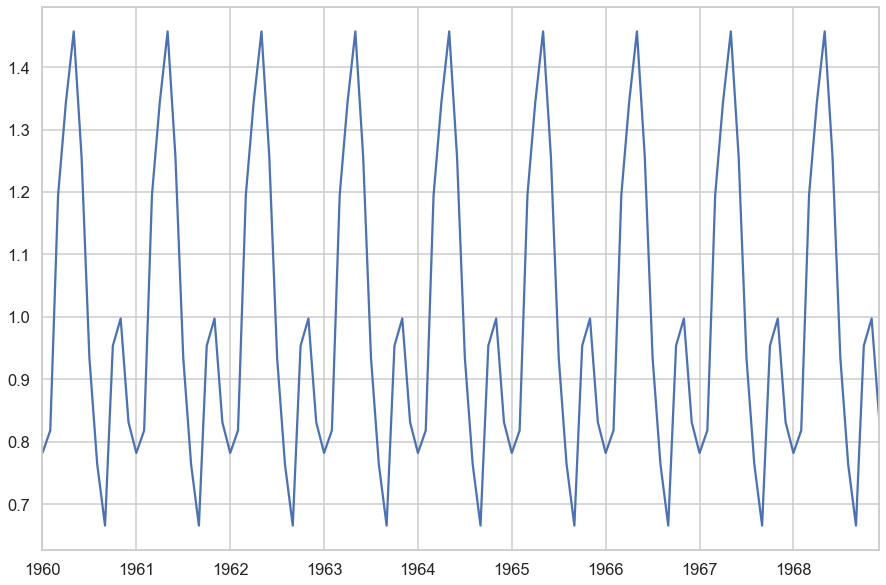

In [181]:
result.seasonal.plot()

In [182]:
result = adfuller(df['Sales'])
print('p-value: %f' % result[1])

p-value: 0.663269


In [183]:
df['diff'] = df['Sales'].diff()
df.dropna(inplace=True)

result = adfuller(df['diff'])
print('p-value: %f' % result[1])

p-value: 0.000000


<AxesSubplot:>

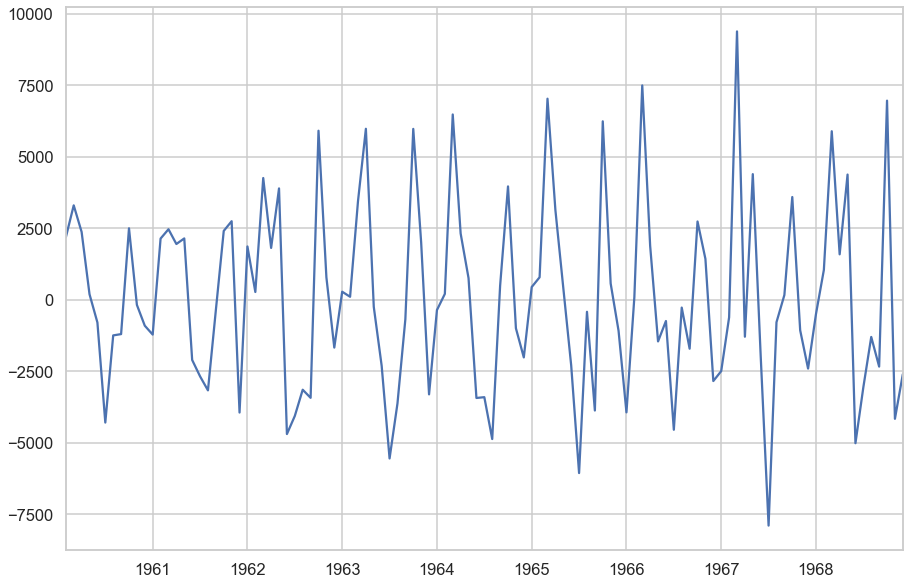

In [184]:
df['diff'].plot()

Задание №2
Сделать графики авто корреляции и часточной автокорреляции с помощью функций  plot_acf  и  plot_pacf .

Если при использовании функции  plot_pacf  появляется ошибка RuntimeWarning: invalid value encountered in sqrt , можно изменить дефолтное значение метода, используемого для рассчета частичной автокорреляции. Почитать про методы можно почитать здесь: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

Попробуйте использовать  method = 'ldadjusted' 

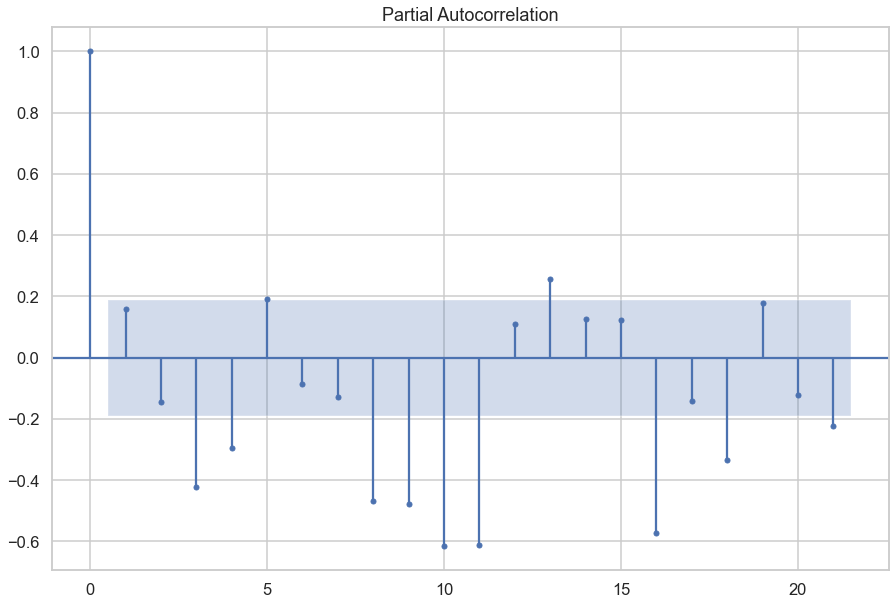

In [185]:
plot_pacf(df['diff'].dropna())
plt.show()

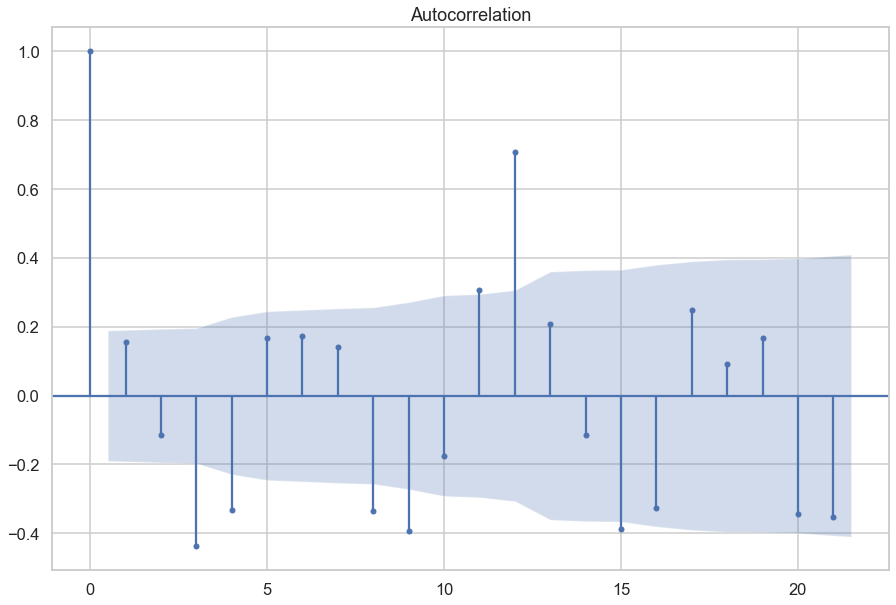

In [186]:
plot_acf(df['diff'].dropna())
plt.show()

In [187]:
# split data into train and test

# what is the size of 80% ? 
size = int(len(df)*0.8)

# use 80% for train and 20% for test

train, test = df[0:size], df[size:]
print(f'Length of train is {len(train)} and lenght of test is {len(test)}')

Length of train is 85 and lenght of test is 22


In [188]:
model = ARIMA(train['Sales'], order=(2,1,2))
model_fit = model.fit(cov_type = 'approx')
preds = model_fit.forecast(len(test))

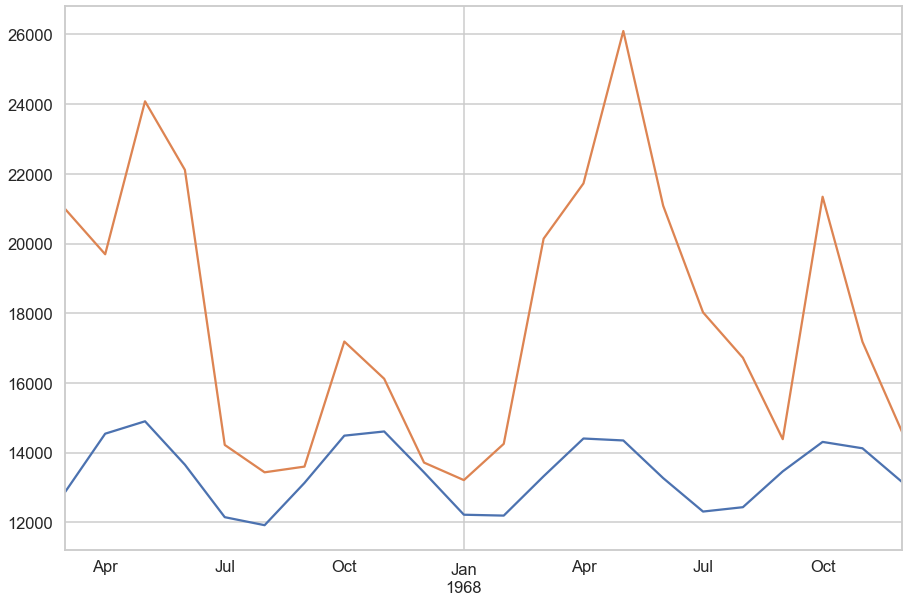

In [189]:
preds.plot()
test['Sales'].plot()
plt.show()

Задание №3
Используя auto_arima найти оптимальный набор параметров, натренировать на нем модель (на тренировочных данных) и сделать прогноз для теста. Сделать графики и посчитать качество предсказаний, используя метрики  r2_score  и  mean_absolute_error .

In [190]:
model = ARIMA(df['Sales'], order=(1,1,20))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\v.shvetsova\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  107
Model:                ARIMA(1, 1, 20)   Log Likelihood                -962.853
Date:                Mon, 20 Jun 2022   AIC                           1969.705
Time:                        15:33:49   BIC                           2028.301
Sample:                    02-01-1960   HQIC                          1993.455
                         - 12-01-1968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2466      6.271     -0.039      0.969     -12.538      12.045
ma.L1          0.0320      6.199      0.005      0.996     -12.118      12.182
ma.L2         -0.3071      1.328     -0.231      0.8

C:\Users\v.shvetsova\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


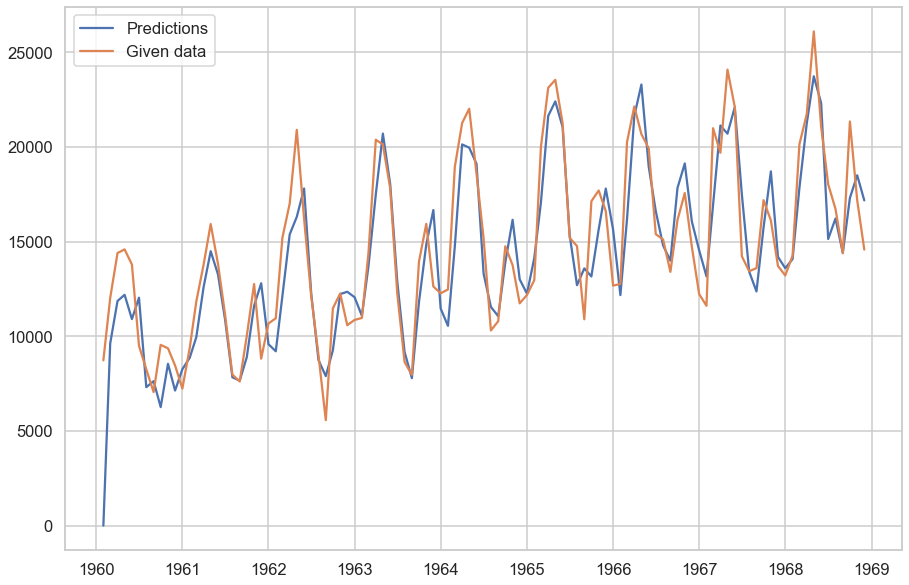

In [191]:
predictions = model_fit.predict()
fig, ax = plt.subplots()
ax.plot(predictions, label = 'Predictions')
ax.plot(df['Sales'], label = 'Given data')
plt.legend()
plt.show()

In [193]:
#validation


train, test = df[['Sales']][0:-12], df[['Sales']][-12:]
model = ARIMA(train['Sales'], order=(1,1,20))
model_fit = model.fit()

forecast = model_fit.forecast(len(test))

C:\Users\v.shvetsova\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


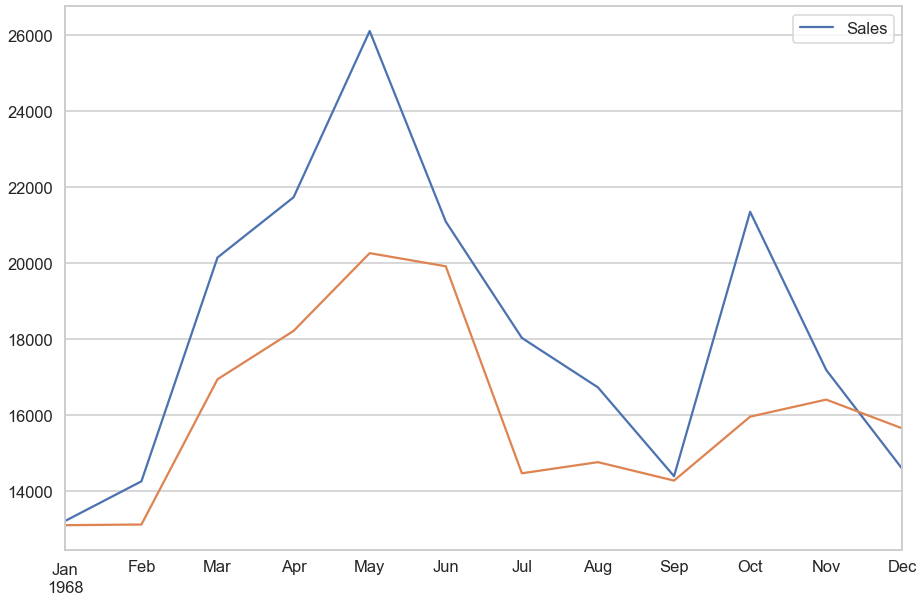

In [194]:
test.plot()
forecast.plot()
plt.show()

In [195]:
from sklearn.metrics import r2_score

In [196]:
r2_score(test, forecast)

0.3648042571840401

In [199]:
from sklearn.metrics import mean_absolute_error

In [201]:
print(mean_absolute_error(test, forecast))

2322.405953473642
